# Exercise 1: Language identification¶

Write a text classification pipeline using a custom preprocessor and `CharNGramAnalyzer` using data from Wikipedia articles as training set.

Evaluate the performance on some held out test set


# Build a language detector model

The goal of this exercise is to train a linear classifier on text features
that represent sequences of up to 3 consecutive characters so as to be
recognize natural languages by using the frequencies of short character
sequences as `fingerprints`

# Downlaod dataset

 - we run`fetch_data.py`
 - returns 3 folders
     1. html
     2. paragraphs
     3. short_paragraphs

## Load imports

In [1]:
import sys
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
ls data/languages/

fetch_data.py*  html/  paragraphs/  short_paragraphs/


In [3]:
# The training data folder must be passed as first argument
languages_data_folder = "data/languages/paragraphs/"
dataset = load_files(languages_data_folder)

In [4]:
type(dataset)

sklearn.utils.Bunch

In [5]:
len(dataset)

5

In [6]:
dataset.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [7]:
dataset.target

array([ 3,  3,  3,  5,  5,  9,  9,  6,  8,  6,  0,  3,  1, 10,  2,  2,  7,
        7,  9,  2,  5,  1,  1,  3,  4,  3,  3,  9,  5,  6,  1,  3,  2,  4,
        2,  8,  9,  3,  3,  8,  1,  1, 10,  1, 10,  6,  3,  1,  5,  1,  4,
       10,  2,  2, 10,  1,  2,  3,  5,  3, 10,  5,  1,  6, 10,  3,  6,  1,
        4,  3, 10,  5,  2,  5,  4,  6,  2,  4,  9,  4,  6,  9,  2,  5,  1,
        2,  2,  5,  2,  7,  5,  3,  4,  9,  5, 10,  8, 10,  1,  9,  5,  9,
        6,  8,  3,  9,  6,  4, 10,  3,  2,  4,  5,  4, 10, 10,  3,  0,  6,
        8,  1,  9,  8,  2, 10,  2,  5,  2,  2,  5,  1,  1,  5,  1,  3,  7,
        9,  5,  2,  9,  4,  4,  5,  6, 10,  3,  2,  4,  4,  7,  9,  9,  1,
        4,  4, 10,  7,  2, 10,  1,  7,  8,  2,  8,  2,  2,  7,  3, 10,  2,
        2,  2,  0, 10,  7,  6,  2,  9,  1,  9,  3,  4,  4,  2,  2,  3,  4,
        6,  9,  1,  5,  1,  5,  9,  9,  1,  1,  1,  9,  2,  8,  4,  3,  5,
        5,  0,  6,  4,  6,  3,  6,  1,  1,  6,  2,  2,  2,  2,  2,  2, 10,
        3,  2,  0,  4,  4

In [8]:
dataset.target_names

['ar', 'de', 'en', 'es', 'fr', 'it', 'ja', 'nl', 'pl', 'pt', 'ru']

In [9]:
dataset.filenames

array(['data/languages/paragraphs/es/es_0119.txt',
       'data/languages/paragraphs/es/es_0091.txt',
       'data/languages/paragraphs/es/es_0010.txt',
       'data/languages/paragraphs/it/it_0055.txt',
       'data/languages/paragraphs/it/it_0008.txt',
       'data/languages/paragraphs/pt/pt_0089.txt',
       'data/languages/paragraphs/pt/pt_0094.txt',
       'data/languages/paragraphs/ja/ja_0045.txt',
       'data/languages/paragraphs/pl/pl_0011.txt',
       'data/languages/paragraphs/ja/ja_0064.txt',
       'data/languages/paragraphs/ar/ar_0014.txt',
       'data/languages/paragraphs/es/es_0061.txt',
       'data/languages/paragraphs/de/de_0070.txt',
       'data/languages/paragraphs/ru/ru_0000.txt',
       'data/languages/paragraphs/en/en_0072.txt',
       'data/languages/paragraphs/en/en_0033.txt',
       'data/languages/paragraphs/nl/nl_0042.txt',
       'data/languages/paragraphs/nl/nl_0010.txt',
       'data/languages/paragraphs/pt/pt_0032.txt',
       'data/languages/paragrap

## Split to train test

In [10]:
train_test_split?

In [11]:
# Split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.33, random_state=42)

# TASK: 
## Build a vectorizer that splits strings into sequence of 1 to 3 characters instead of word tokens

In [12]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), 
                             analyzer='char',
                             use_idf=False)

# TASK: 
## Build a vectorizer / classifier pipeline using the previous analyzer the pipeline instance should stored in a variable named `clf`

In [13]:
clf = Pipeline([
    ('vec', vectorizer),
    ('clf', Perceptron(tol=1e-3)),
])

# TASK: Fit the pipeline on the training set


In [14]:
clf.fit(docs_train, y_train)

Pipeline(memory=None,
     steps=[('vec', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
   ..._jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=0.001, verbose=0, warm_start=False))])

# TASK: Predict the outcome on the testing set in a variable named y_predicted


In [15]:
y_predicted = clf.predict(docs_test)

In [16]:
metrics.accuracy_score(y_test,y_predicted)

0.9907407407407407

#### Result
0.9907407407407407

###  Print the classification report


In [17]:
print(metrics.classification_report(y_test, 
                                    y_predicted,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

         ar       0.91      1.00      0.95        10
         de       1.00      1.00      1.00        45
         en       0.98      1.00      0.99        51
         es       1.00      0.95      0.98        43
         fr       1.00      0.97      0.99        36
         it       1.00      1.00      1.00        27
         ja       1.00      1.00      1.00        27
         nl       1.00      1.00      1.00        12
         pl       1.00      1.00      1.00        14
         pt       0.97      1.00      0.99        36
         ru       1.00      1.00      1.00        23

avg / total       0.99      0.99      0.99       324



# display and plot the confusion matrix


In [18]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[10  0  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0  0]
 [ 0  0  1 41  0  0  0  0  0  1  0]
 [ 1  0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  0  0 23]]


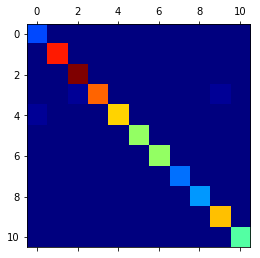

In [23]:
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)
plt.show()

## Predict the result on some short new sentences:


In [20]:
sentences = [
    'This is a language detection test.',
    'Ceci est un test de d\xe9tection de la langue.',
    'Dies ist ein Test, um die Sprache zu erkennen.',
]

In [21]:
predicted = clf.predict(sentences)

In [22]:
for s, p in zip(sentences, predicted):
    print('{} --> PREDICTED LANGUAGE --> {}'.format(s,dataset.target_names[p]))

This is a language detection test. --> PREDICTED LANGUAGE --> en
Ceci est un test de détection de la langue. --> PREDICTED LANGUAGE --> fr
Dies ist ein Test, um die Sprache zu erkennen. --> PREDICTED LANGUAGE --> de


## Result

- This is a language detection test. --> PREDICTED LANGUAGE --> en
- Ceci est un test de détection de la langue. --> PREDICTED LANGUAGE --> fr
- Dies ist ein Test, um die Sprache zu erkennen. --> PREDICTED LANGUAGE --> de